In [ ]:
# Gradient Descent for Neural Network (Logistic Regression)

This notebook demonstrates predicting whether a person would buy life insurance based on their age and affordability.

- Binary classification problem: 1 → buys insurance, 0 → does not buy.
- Using TensorFlow 2.0, Keras, Python, and supporting libraries.
- Includes gradient descent optimization and logistic regression.

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [ ]:
## Dataset

- Load the insurance dataset `insurance_data.csv`.
- The dataset has columns: age, affordability, bought_insurance.

In [6]:
df = pd.read_csv("/home/muhammad/Desktop/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
## Data Preprocessing

- Split dataset into features (`age`, `affordibility`) and target (`bought_insurance`).
- Split into training and test sets.
- Scale `age` feature for better model performance.
- Use a small subset for training to avoid freezing in GitHub preview.

In [20]:
# Features and target
X = df[['age', 'affordibility']]
y = df['bought_insurance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Scale age
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

# Small subset for GitHub preview
X_train_small = X_train_scaled[:20]
y_train_small = y_train[:20]
X_test_small = X_test_scaled[:10]
y_test_small = y_test[:10]

In [ ]:
## Model Definition

- Simple neural network (logistic regression) with one output neuron and sigmoid activation.
- Compile with Adam optimizer and binary crossentropy loss.

In [21]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/home/muhammad/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Model Training

- Train on a small subset to prevent freezing in GitHub preview.
- Display training logs for few epochs.

In [23]:
history = model.fit(
    X_train_small, y_train_small,
    epochs=5,
    batch_size=4,
    verbose=1
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3361 - loss: 0.7727  
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 0.8424 
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3326 - loss: 0.7613 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2146 - loss: 0.8401     
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2597 - loss: 0.8137     


In [ ]:
## Model Predictions

- Predict probabilities for the test subset.
- Values closer to 1 → likely to buy insurance, closer to 0 → unlikely.

In [24]:
predictions = model.predict(X_test_small)
print("Predictions (small subset):", predictions)

# Convert to class 0 or 1
predicted_classes = (predictions > 0.5).astype(int)
print("Predicted Classes:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predictions (small subset): [[0.40041107]
 [0.3157528 ]
 [0.5943067 ]
 [0.343912  ]
 [0.40654603]
 [0.44390666]]
Predicted Classes: [[0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
## Training Metrics

- Plot loss and accuracy to visualize training progress.

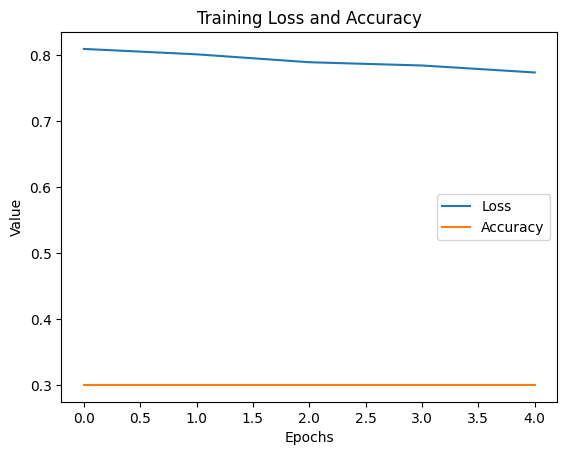

In [25]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()